## Supervised Machine Learning -- Imbalanced Learning

In the supervised machine learning setting, the class label for each record in the training set is provided and the goal is to train a classifier that would be used for prediction on unseen data. Here, we trained two classifiers

1. Logistic Regression

2. Random Forest.

The results below show that the two classifiers perform extremely well on the dataset. The AUC-ROC and AUC-PRC are for on the training (cross-validation) and test sets

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

plt.rcParams.update({'font.size': 15})

In [2]:
# Import custom class
%run -i '../src/transfxns.py'
%run -i '../src/sup_ml.py'

In [3]:
# Instantiate the classes
transfxn = TransformationPipeline()
model = SupervisedModels()

In [5]:
# Load Data 
df = pd.read_csv('kdd99-unsupervised-ad.csv', header=None)
print("Data size:", df.shape) # print data size
df.columns = ['v_{}'.format(i) for i in range(30)] # column names
#df.head()

Data size: (620098, 30)


In [6]:
# Convert to string
cols = ['v_6', 'v_7', 'v_8', 'v_9']
for i, val in enumerate(cols):
    df[val] = df[val].astype('O')

In [7]:
# Create feature matrix and class label
X, y = df.drop('v_29', axis = 1), df.v_29

In [8]:
# Map to binary
y = y.map({'n':0, 'o':1}) 

In [9]:
# Create a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [10]:
print('Training set size:', X_train.shape, y_train.shape)
print('Test set size:', X_test.shape, y_test.shape)

Training set size: (496078, 29) (496078,)
Test set size: (124020, 29) (124020,)


In [11]:
print(f'Training set class distribution:\n {(y_train.value_counts()/X_train.shape[0])*100}')
print('--' * 15)
print(f'Test set class distribution:\n {(y_test.value_counts()/X_test.shape[0])*100}')

Training set class distribution:
 0    99.830269
1     0.169731
Name: v_29, dtype: float64
------------------------------
Test set class distribution:
 0    99.830672
1     0.169328
Name: v_29, dtype: float64


In [12]:
# Transform and scale data
X_train_scaled, X_test_scaled, feat_nm = transfxn.preprocessing(X_train, X_test)

In [13]:
print(f'Training set size after pre-processing: {X_train_scaled.shape, y_train.shape}')
print(f'Test set size after pre-processing: {X_test_scaled.shape, y_test.shape}')

Training set size after pre-processing: ((496078, 33), (496078,))
Test set size after pre-processing: ((124020, 33), (124020,))


In [14]:
# Convert the class labels to arrays
y_train, y_test = y_train.values, y_test.values

## Model Training

#### 1. Logistic Regression

In [15]:
log_clf = LogisticRegression(random_state=42)  
log_clf.fit(X_train_scaled, y_train)

# Prediction on the training set
model.prediction(log_clf, X_train_scaled, y_train, 
                 subset='training set',
                 model_nm='Logistic Regression',
                )

Predictions on the training set for Logistic Regression
------------------------------------------------------------
Accuracy:  0.999984
AUROC: 0.999998
AUPRC: 0.996187
Predicted classes: [0 1]
Confusion matrix:
 [[495235      1]
 [     7    835]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    495236
           1       1.00      0.99      1.00       842

    accuracy                           1.00    496078
   macro avg       1.00      1.00      1.00    496078
weighted avg       1.00      1.00      1.00    496078

------------------------------------------------------------


#### 2. Cross-validation for Logistic Regression

In [16]:
lr_clf = LogisticRegression()
model.prediction_cv(lr_clf, X_train_scaled, y_train, cv_fold=5, 
                    scoring='accuracy', 
                    model_nm='Logistic Regression',
                   )

5-fold cross-validation for Logistic Regression
------------------------------------------------------------
Accuracy (std): 0.999960 (0.000019)
AUROC: 0.999995
AUPRC: 0.992655
Predicted classes: [0 1]
Confusion matrix:
 [[495229      7]
 [    13    829]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    495236
           1       0.99      0.98      0.99       842

    accuracy                           1.00    496078
   macro avg       1.00      0.99      0.99    496078
weighted avg       1.00      1.00      1.00    496078

------------------------------------------------------------


#### 3. Random Forest

In [17]:
rf_clf = RandomForestClassifier(random_state=42)  
rf_clf.fit(X_train_scaled, y_train)

# Prediction on the training set
model.prediction(rf_clf, X_train_scaled, y_train, 
                 subset='training set',
                 model_nm='Random Forest',
                )

Predictions on the training set for Random Forest
------------------------------------------------------------
Accuracy:  1.000000
AUROC: 1.000000
AUPRC: 1.000000
Predicted classes: [0 1]
Confusion matrix:
 [[495236      0]
 [     0    842]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    495236
           1       1.00      1.00      1.00       842

    accuracy                           1.00    496078
   macro avg       1.00      1.00      1.00    496078
weighted avg       1.00      1.00      1.00    496078

------------------------------------------------------------


#### 4. Cross-validation for Random Forest

In [18]:
model.prediction_cv(rf_clf, X_train_scaled, y_train, cv_fold=5, 
                    scoring='accuracy',
                    model_nm='Random Forest',
                   )

5-fold cross-validation for Random Forest
------------------------------------------------------------
Accuracy (std): 0.999990 (0.000011)
AUROC: 1.000000
AUPRC: 0.999916
Predicted classes: [0 1]
Confusion matrix:
 [[495235      1]
 [     4    838]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    495236
           1       1.00      1.00      1.00       842

    accuracy                           1.00    496078
   macro avg       1.00      1.00      1.00    496078
weighted avg       1.00      1.00      1.00    496078

------------------------------------------------------------


## Test Prediction

#### 1. Logistic Regression

In [19]:
model.prediction(lr_clf, X_test_scaled, y_test, 
                 subset='test set',
                 model_nm='Logistic Regression',
                )

Predictions on the test set for Logistic Regression
------------------------------------------------------------
Accuracy:  0.999984
AUROC: 1.000000
AUPRC: 0.999955
Predicted classes: [0 1]
Confusion matrix:
 [[123810      0]
 [     2    208]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    123810
           1       1.00      0.99      1.00       210

    accuracy                           1.00    124020
   macro avg       1.00      1.00      1.00    124020
weighted avg       1.00      1.00      1.00    124020

------------------------------------------------------------


#### 2. Random Forest 

In [20]:
model.prediction(rf_clf, X_test_scaled, y_test,
                subset='test set',
                model_nm = 'Random Forest',
               )

Predictions on the test set for Random Forest
------------------------------------------------------------
Accuracy:  0.999992
AUROC: 1.000000
AUPRC: 1.000000
Predicted classes: [0 1]
Confusion matrix:
 [[123810      0]
 [     1    209]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    123810
           1       1.00      1.00      1.00       210

    accuracy                           1.00    124020
   macro avg       1.00      1.00      1.00    124020
weighted avg       1.00      1.00      1.00    124020

------------------------------------------------------------


Text(0.5, 1.0, 'Feature Importances')

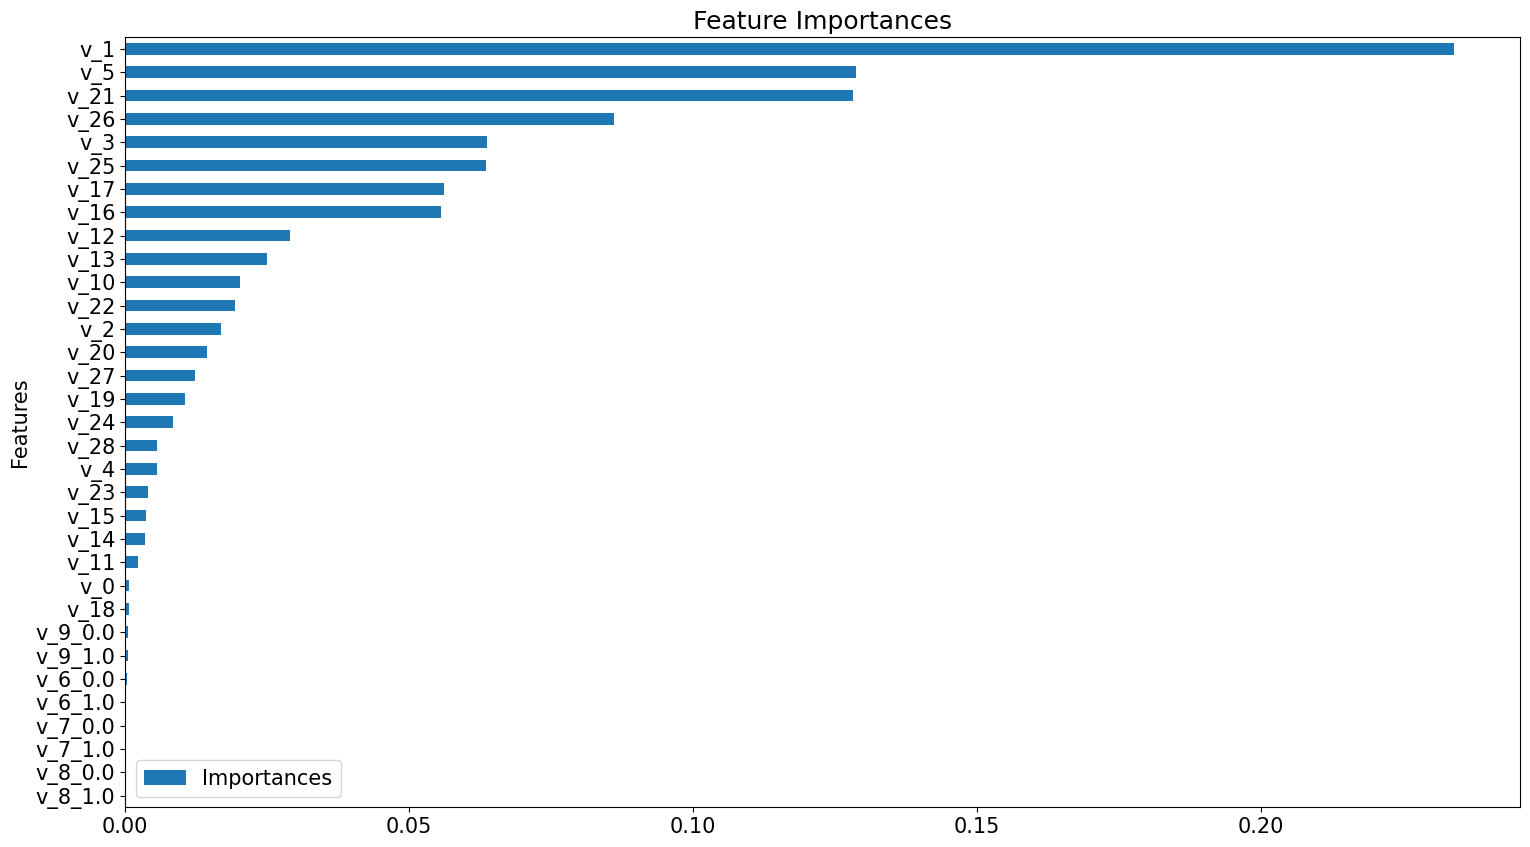

In [22]:
# Compute feature importances
importances_df = pd.DataFrame(
    {
        'Features': feat_nm, 
        'Importances': rf_clf.feature_importances_,
    }
)
# Plot
importances_df.sort_values('Importances', ascending=True, inplace=True)
importances_df.set_index('Features', inplace=True)
importances_df.plot(kind='barh', figsize=(18,10))
plt.title('Feature Importances')

#### 3. ROC and PR Curves 

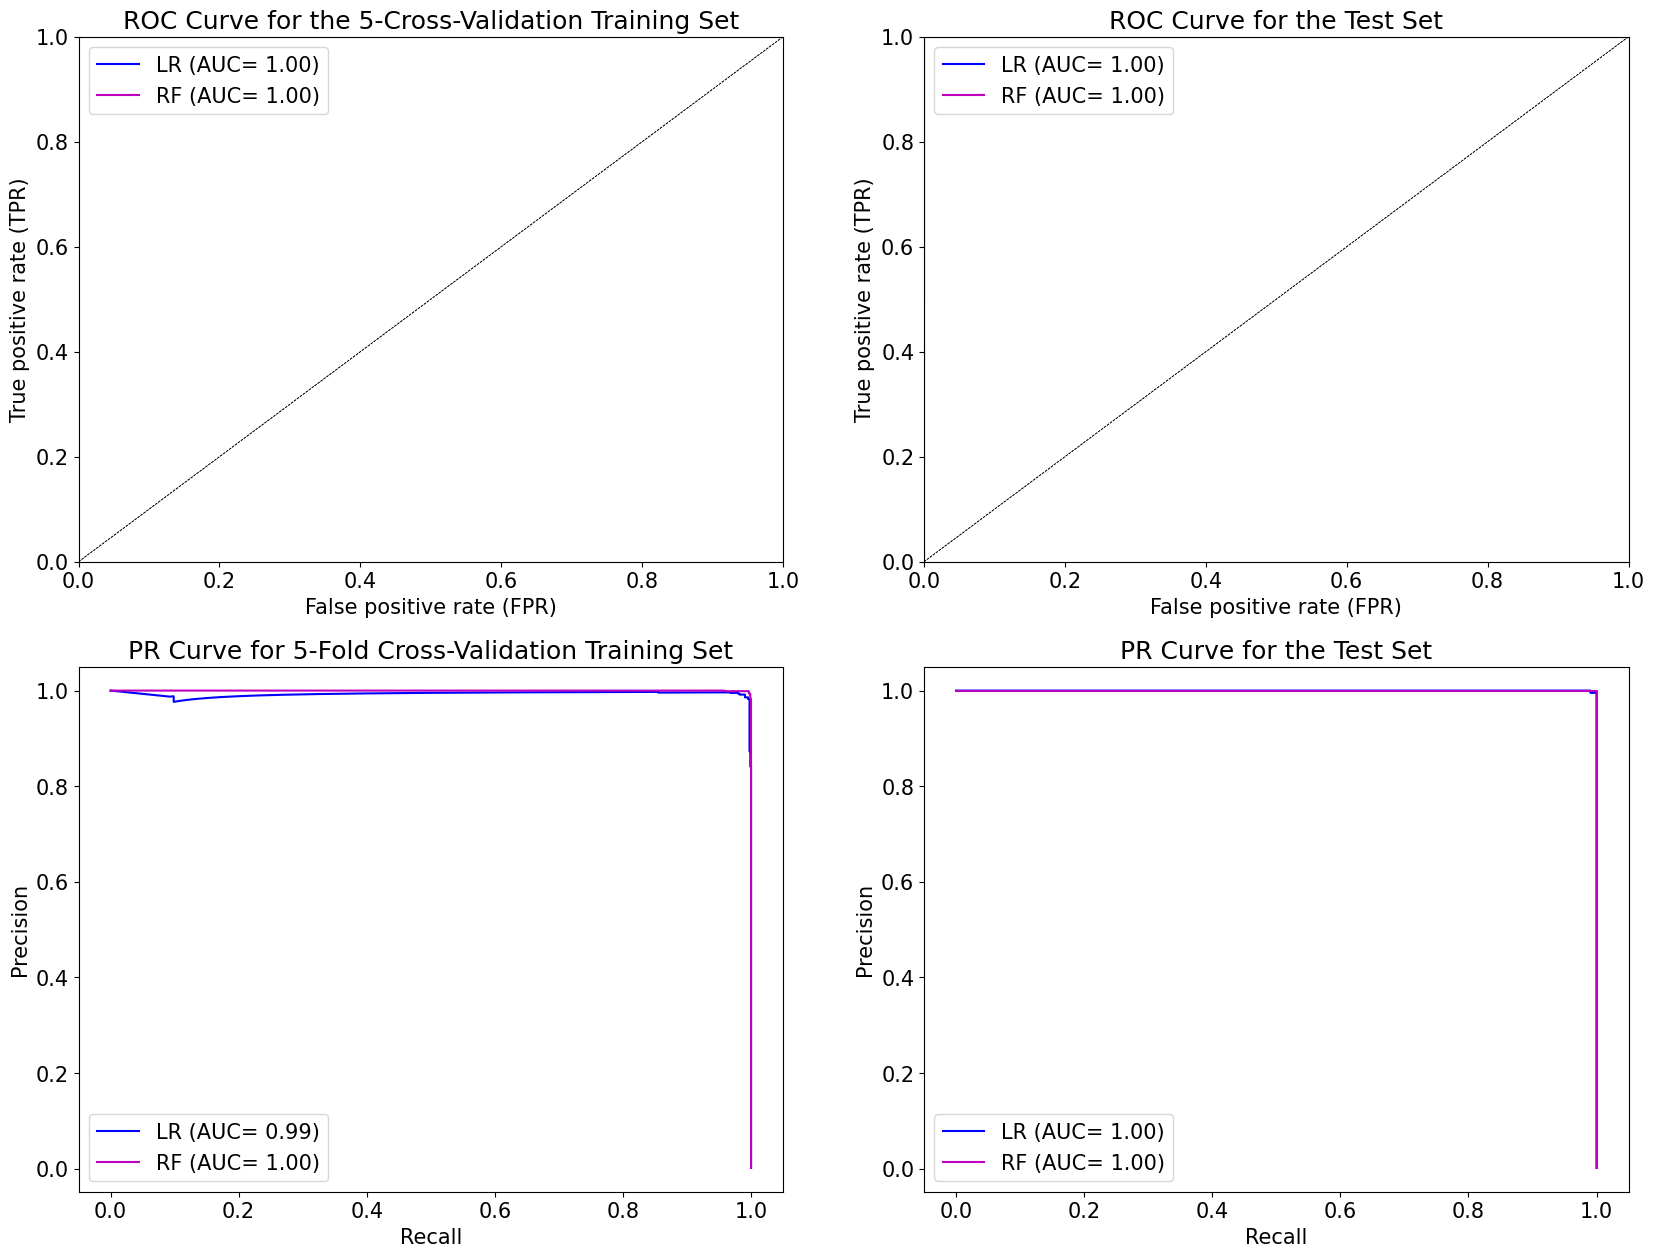

In [21]:
plt.figure(figsize=(20,15))

# LR
model.plot_roc_pr_curves(lr_clf, X_train_scaled, y_train, X_test_scaled, y_test,
                         cv_fold=5, color='b', label='LR (AUC= %0.2f)')
# RF
model.plot_roc_pr_curves(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test,
                         cv_fold=5, color='m', label='RF (AUC= %0.2f)')